# Web Scraping using BeautifulSoup

## Import Libraries

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Read webpage

<b>Top 100 buyers of beauty and related skincare imports. Ranked in descending order.</b>

2020-1: change in international sales from 2020 to 2021.

%Total: percentage of the world’s total purchases of imported cosmetics in 2021

US$: Annual sales amount

In [ ]:
url = 'https://importedconsumerproducts.com/beauty-cosmetics/'

page = requests.get(url)

page

<Response [200]>

## Load webpage content

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
table = soup.find_all("table", class_ = "tablepress tablepress-id-39")
table

[<table class="tablepress tablepress-id-39" id="tablepress-39">
 <thead>
 <tr class="row-1 odd">
 <th class="column-1">Rank</th><th class="column-2">Importer</th><th class="column-3">US$</th><th class="column-4">%Total</th><th class="column-5">2020-1</th>
 </tr>
 </thead>
 <tbody class="row-hover">
 <tr class="row-2 even">
 <td class="column-1">1</td><td class="column-2">China</td><td class="column-3">$20,287,362,000</td><td class="column-4">27.2%</td><td class="column-5">+17.1%</td>
 </tr>
 <tr class="row-3 odd">
 <td class="column-1">2</td><td class="column-2">Hong Kong</td><td class="column-3">$7,280,376,000</td><td class="column-4">9.8%</td><td class="column-5">+0.6%</td>
 </tr>
 <tr class="row-4 even">
 <td class="column-1">3</td><td class="column-2">United States</td><td class="column-3">$5,557,871,000</td><td class="column-4">7.5%</td><td class="column-5">+23.9%</td>
 </tr>
 <tr class="row-5 odd">
 <td class="column-1">4</td><td class="column-2">Macao</td><td class="column-3">$3

## Read column headings

In [ ]:
x =soup.find_all("th")
x

[<th class="column-1">Rank</th>,
 <th class="column-2">Importer</th>,
 <th class="column-3">US$</th>,
 <th class="column-4">%Total</th>,
 <th class="column-5">2020-1</th>]

In [ ]:
column_nm =  [title.text.strip() for title in x]
column_nm

['Rank', 'Importer', 'US$', '%Total', '2020-1']

## Create dataframe and load column names

In [ ]:
skincare=[]
skincare = pd.DataFrame(columns=column_nm)
skincare

,Rank,Importer,US$,%Total,2020-1


In [ ]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      0 non-null      object
 1   Importer  0 non-null      object
 2   US$       0 non-null      object
 3   %Total    0 non-null      object
 4   2020-1    0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [1]:
#skincare.drop(columns='', inplace=True)

## Process HTML table to populate dataframe with rows of data

In [ ]:
# Create a loop to read row data
# Look for tag "tr" then look for tag "td"
#  HTML table has two rows where the length is zero.  Add code to skip those rows.
table_column = soup.tbody.find_all('tr')
for row in table_column:
    # Find all data for each column
    row_data = row.find_all('td', class_ =['column-1','column-2','column-3','column-4','column-5'])
    individual_row_data = [data.text.strip() for data in row_data]
    if len(individual_row_data) < 5:
      pass
    else:
       #print(individual_row_data, "len: ", len(individual_row_data))
       length = len(skincare)
       skincare.loc[length] = individual_row_data

## Display populated dataframe

In [ ]:
skincare

,Rank,Importer,US$,%Total,2020-1
0,1,China,"$20,287,362,000",27.2%,+17.1%
1,2,Hong Kong,"$7,280,376,000",9.8%,+0.6%
2,3,United States,"$5,557,871,000",7.5%,+23.9%
3,4,Macao,"$3,221,960,000",4.3%,+36.6%
4,5,Singapore,"$3,087,914,000",4.1%,+6.7%
...,...,...,...,...,...
95,96,Mongolia,"$24,861,000",0.03%,+46.2%
96,97,Honduras,"$23,818,000",0.03%,+37%
97,98,Albania,"$23,726,000",0.03%,+26%
98,99,North Macedonia,"$22,232,000",0.03%,+31%


## Data Cleaning

In [ ]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      100 non-null    object
 1   Importer  100 non-null    object
 2   US$       100 non-null    object
 3   %Total    100 non-null    object
 4   2020-1    100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


### Remove % from '%Total' column

In [ ]:
skincare['%Total']=skincare['%Total'].map(lambda x: x.rstrip('%'))
skincare

,Rank,Importer,US$,%Total,2020-1
0,1,China,"$20,287,362,000",27.2,+17.1%
1,2,Hong Kong,"$7,280,376,000",9.8,+0.6%
2,3,United States,"$5,557,871,000",7.5,+23.9%
3,4,Macao,"$3,221,960,000",4.3,+36.6%
4,5,Singapore,"$3,087,914,000",4.1,+6.7%
...,...,...,...,...,...
95,96,Mongolia,"$24,861,000",0.03,+46.2%
96,97,Honduras,"$23,818,000",0.03,+37%
97,98,Albania,"$23,726,000",0.03,+26%
98,99,North Macedonia,"$22,232,000",0.03,+31%


### Remove  dollar sign from 'US$' column

In [ ]:
skincare['US$']=skincare['US$'].map(lambda x: x.lstrip('$'))
skincare

,Rank,Importer,US$,%Total,2020-1
0,1,China,"20,287,362,000",27.2,+17.1%
1,2,Hong Kong,"7,280,376,000",9.8,+0.6%
2,3,United States,"5,557,871,000",7.5,+23.9%
3,4,Macao,"3,221,960,000",4.3,+36.6%
4,5,Singapore,"3,087,914,000",4.1,+6.7%
...,...,...,...,...,...
95,96,Mongolia,"24,861,000",0.03,+46.2%
96,97,Honduras,"23,818,000",0.03,+37%
97,98,Albania,"23,726,000",0.03,+26%
98,99,North Macedonia,"22,232,000",0.03,+31%


### Remove % from '2020-1' column

In [ ]:
skincare['2020-1']=skincare['2020-1'].map(lambda x: x.rstrip('%'))
skincare

,Rank,Importer,US$,%Total,2020-1
0,1,China,"20,287,362,000",27.2,+17.1
1,2,Hong Kong,"7,280,376,000",9.8,+0.6
2,3,United States,"5,557,871,000",7.5,+23.9
3,4,Macao,"3,221,960,000",4.3,+36.6
4,5,Singapore,"3,087,914,000",4.1,+6.7
...,...,...,...,...,...
95,96,Mongolia,"24,861,000",0.03,+46.2
96,97,Honduras,"23,818,000",0.03,+37
97,98,Albania,"23,726,000",0.03,+26
98,99,North Macedonia,"22,232,000",0.03,+31


In [ ]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      100 non-null    object
 1   Importer  100 non-null    object
 2   US$       100 non-null    object
 3   %Total    100 non-null    object
 4   2020-1    100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [ ]:
skincare2 = skincare.copy(deep=True)
skincare2

,Rank,Importer,US$,%Total,2020-1
0,1,China,"20,287,362,000",27.2,+17.1
1,2,Hong Kong,"7,280,376,000",9.8,+0.6
2,3,United States,"5,557,871,000",7.5,+23.9
3,4,Macao,"3,221,960,000",4.3,+36.6
4,5,Singapore,"3,087,914,000",4.1,+6.7
...,...,...,...,...,...
95,96,Mongolia,"24,861,000",0.03,+46.2
96,97,Honduras,"23,818,000",0.03,+37
97,98,Albania,"23,726,000",0.03,+26
98,99,North Macedonia,"22,232,000",0.03,+31


### Convert data type Object to String or Numeric depending on column

In [191]:
skincare2['%Total'] = pd.to_numeric(skincare2['%Total'], downcast='float')

In [192]:
skincare2['2020-1'] = pd.to_numeric(skincare2['2020-1'], downcast='signed')

In [193]:
skincare2['US$'] = pd.to_numeric(skincare2['US$'].str.replace('[^0-9.]', ''))

<ipython-input-193-d463c7e98e4e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  skincare2['US$'] = pd.to_numeric(skincare2['US$'].str.replace('[^0-9.]', ''))


In [194]:
skincare2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      100 non-null    object 
 1   Importer  100 non-null    object 
 2   US$       100 non-null    int64  
 3   %Total    100 non-null    float32
 4   2020-1    100 non-null    float64
dtypes: float32(1), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [212]:
skincare2['Rank'] = pd.to_numeric(skincare2['Rank'])

In [203]:
skincare2['Importer'] = skincare2['Importer'].astype("string")

## Data Visualization

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

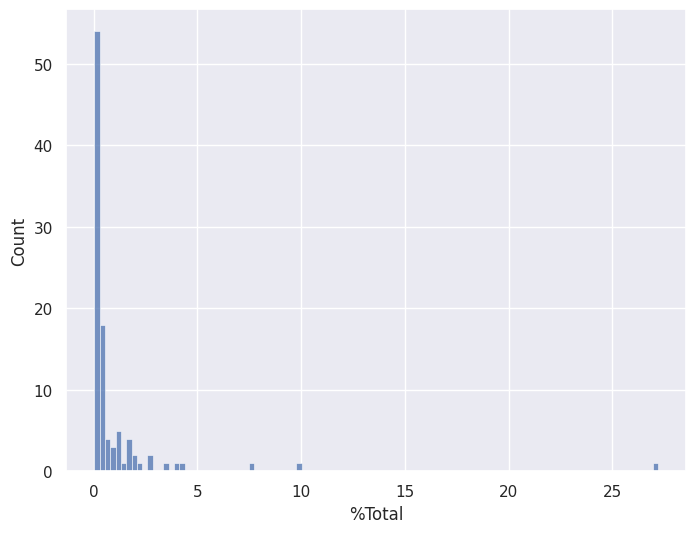

In [231]:
#sns.set(rc={"figure.figsize":(8,6)})

sns.histplot(skincare2['%Total'])
plt.show()


<Axes: xlabel='2020-1', ylabel='Count'>

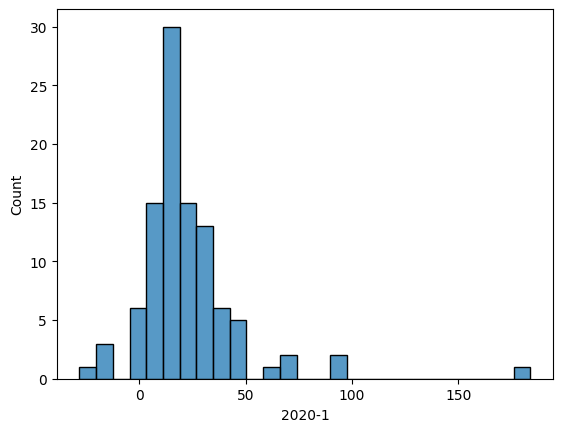

In [221]:
sns.histplot(skincare2['2020-1'])

## Alternative method: Read HTML table using Pandas

In [ ]:
df_pandas = pd.read_html(url, attrs = {'class': 'tablepress tablepress-id-39'},  flavor='bs4', thousands ='.')
df_pandas[0].head()

,Rank,Importer,US$,%Total,2020-1
0,1.0,China,"$20,287,362,000",27.2%,+17.1%
1,2.0,Hong Kong,"$7,280,376,000",9.8%,+0.6%
2,3.0,United States,"$5,557,871,000",7.5%,+23.9%
3,4.0,Macao,"$3,221,960,000",4.3%,+36.6%
4,5.0,Singapore,"$3,087,914,000",4.1%,+6.7%


In [ ]:
df_pandas[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      100 non-null    float64
 1   Importer  100 non-null    object 
 2   US$       100 non-null    object 
 3   %Total    100 non-null    object 
 4   2020-1    100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.1+ KB
